In [2]:
import pandas as pd
import numpy as np

In [3]:
#read file
df=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [4]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
df.shape

(13611, 17)

In [6]:
#separating labels from the data and creating a different file
target_class=df['Class']
target_class

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [7]:
df=df.drop(['Class'],axis=1)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


Checking for null data

In [8]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [9]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

Visualizing to find any outliers or anomalies in the data

In [10]:
import matplotlib.pyplot as plt

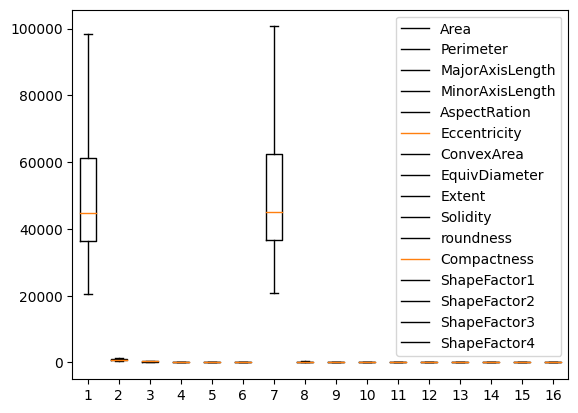

In [11]:
#box plot
plt.boxplot(df,showfliers=False)
plt.legend(df.columns)
plt.show()

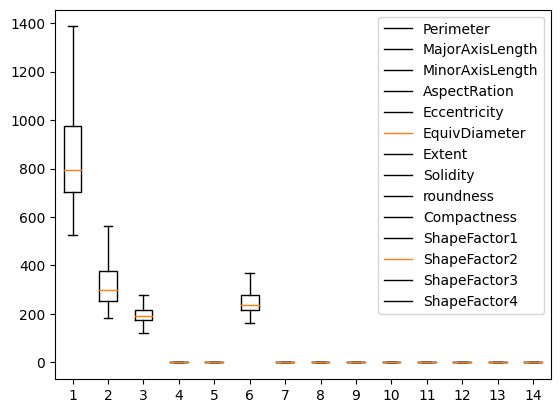

In [12]:
#creating box plot for feature beside area and convex area because of scale
temp_df=df.drop(['Area','ConvexArea'],axis=1)
plt.boxplot(temp_df,showfliers=False)
plt.legend(temp_df.columns)
plt.show()

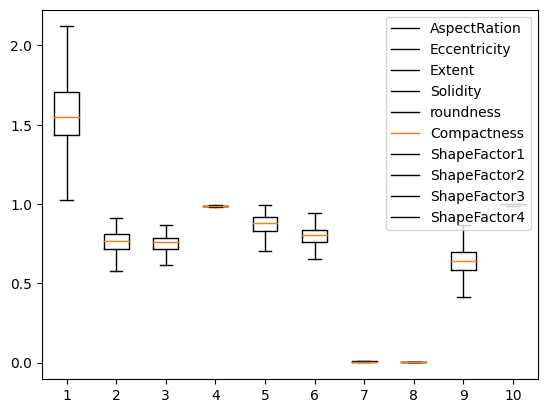

In [13]:
temp_df=temp_df.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter'],axis=1)
plt.boxplot(temp_df,showfliers=False)
plt.legend(temp_df.columns)
plt.show()

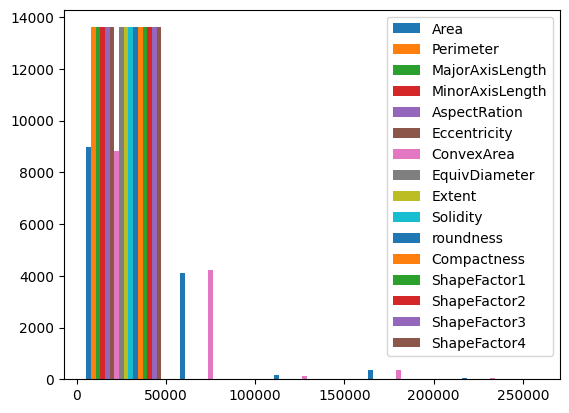

In [14]:
#histogram
plt.hist(df,bins=5,label=df.columns)
plt.legend(df.columns)
plt.show()

Area,ConvexArea has the highest variance.
Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter the next highest variance.


In [15]:
#Expoting tarining and testing dataset
df.to_excel('../Dry-beans-classification/DryBeanDataset/training_dataset.xlsx',index=False)
target_class.to_excel('../Dry-beans-classification/DryBeanDataset/test_dataset.xlsx',index=False)

Partitioning the dataset into a separate training and test set


In [16]:
from sklearn.model_selection import train_test_split
train_dataset=pd.read_excel('../Dry-beans-classification/DryBeanDataset/training_dataset.xlsx')
test_dataset=pd.read_excel('../Dry-beans-classification/DryBeanDataset/test_dataset.xlsx')

In [17]:
train_dataset

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [18]:
test_dataset

,Unnamed: 0,Class
0,0,SEKER
1,1,SEKER
2,2,SEKER
3,3,SEKER
4,4,SEKER
...,...,...
13606,13606,DERMASON
13607,13607,DERMASON
13608,13608,DERMASON
13609,13609,DERMASON


In [19]:
X_train,X_test,y_train,y_test=train_test_split(train_dataset,test_dataset,test_size=0.3,random_state=None,shuffle=True,stratify=None)

In [20]:
print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

(9527, 17) (9527, 2) (4084, 17) (4084, 2)


In [25]:
X_test

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11755,11755,31601,653.394,238.519637,169.033914,1.411076,0.705531,31916,200.588242,0.785665,0.990130,0.930166,0.840972,0.007548,0.002329,0.707233,0.997960
633,633,37165,692.541,236.984265,199.917191,1.185412,0.536990,37477,217.531487,0.750308,0.991675,0.973762,0.917915,0.006377,0.002792,0.842569,0.998791
7484,7484,35867,709.926,263.917884,173.298992,1.522905,0.754204,36262,213.699047,0.788476,0.989107,0.894291,0.809718,0.007358,0.001951,0.655643,0.998482
799,799,38121,704.920,236.598131,205.363991,1.152092,0.496588,38440,220.311517,0.779890,0.991701,0.964039,0.931163,0.006207,0.002878,0.867065,0.998939
9490,9490,48318,837.416,331.801618,186.129574,1.782638,0.827839,48783,248.033039,0.686530,0.990468,0.865837,0.747534,0.006867,0.001323,0.558807,0.996151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,2253,60321,941.694,357.516126,215.137179,1.661805,0.798681,61010,277.133691,0.691675,0.988707,0.854789,0.775164,0.005927,0.001320,0.600879,0.998545
13005,13005,37125,720.143,270.760816,175.029520,1.546944,0.762968,37570,217.414393,0.746351,0.988155,0.899578,0.802976,0.007293,0.001870,0.644770,0.997423
3158,3158,80324,1099.039,404.783023,254.228339,1.592203,0.778164,81394,319.799458,0.779224,0.986854,0.835659,0.790052,0.005039,0.001211,0.624181,0.993823
6820,6820,57141,945.440,370.087531,198.595468,1.863525,0.843826,58117,269.729829,0.699829,0.983206,0.803322,0.728827,0.006477,0.001127,0.531189,0.989884


In [26]:
y_train

,Unnamed: 0,Class
8842,8842,SIRA
4901,4901,CALI
8959,8959,SIRA
12158,12158,DERMASON
2281,2281,BARBUNYA
...,...,...
6001,6001,HOROZ
11777,11777,DERMASON
9800,9800,SIRA
6817,6817,HOROZ


In [27]:
X_test


,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11755,11755,31601,653.394,238.519637,169.033914,1.411076,0.705531,31916,200.588242,0.785665,0.990130,0.930166,0.840972,0.007548,0.002329,0.707233,0.997960
633,633,37165,692.541,236.984265,199.917191,1.185412,0.536990,37477,217.531487,0.750308,0.991675,0.973762,0.917915,0.006377,0.002792,0.842569,0.998791
7484,7484,35867,709.926,263.917884,173.298992,1.522905,0.754204,36262,213.699047,0.788476,0.989107,0.894291,0.809718,0.007358,0.001951,0.655643,0.998482
799,799,38121,704.920,236.598131,205.363991,1.152092,0.496588,38440,220.311517,0.779890,0.991701,0.964039,0.931163,0.006207,0.002878,0.867065,0.998939
9490,9490,48318,837.416,331.801618,186.129574,1.782638,0.827839,48783,248.033039,0.686530,0.990468,0.865837,0.747534,0.006867,0.001323,0.558807,0.996151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,2253,60321,941.694,357.516126,215.137179,1.661805,0.798681,61010,277.133691,0.691675,0.988707,0.854789,0.775164,0.005927,0.001320,0.600879,0.998545
13005,13005,37125,720.143,270.760816,175.029520,1.546944,0.762968,37570,217.414393,0.746351,0.988155,0.899578,0.802976,0.007293,0.001870,0.644770,0.997423
3158,3158,80324,1099.039,404.783023,254.228339,1.592203,0.778164,81394,319.799458,0.779224,0.986854,0.835659,0.790052,0.005039,0.001211,0.624181,0.993823
6820,6820,57141,945.440,370.087531,198.595468,1.863525,0.843826,58117,269.729829,0.699829,0.983206,0.803322,0.728827,0.006477,0.001127,0.531189,0.989884


In [28]:
y_test

,Unnamed: 0,Class
11755,11755,DERMASON
633,633,SEKER
7484,7484,SIRA
799,799,SEKER
9490,9490,SIRA
...,...,...
2253,2253,BARBUNYA
13005,13005,DERMASON
3158,3158,BARBUNYA
6820,6820,HOROZ


Scaling the features

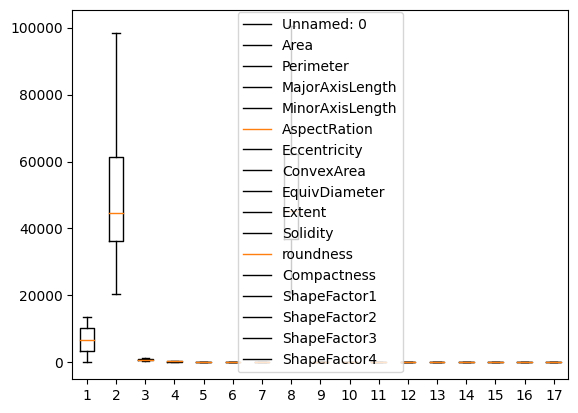

In [29]:
#box plot
plt.boxplot(X_train,showfliers=False)
plt.legend(X_train.columns)
plt.show()

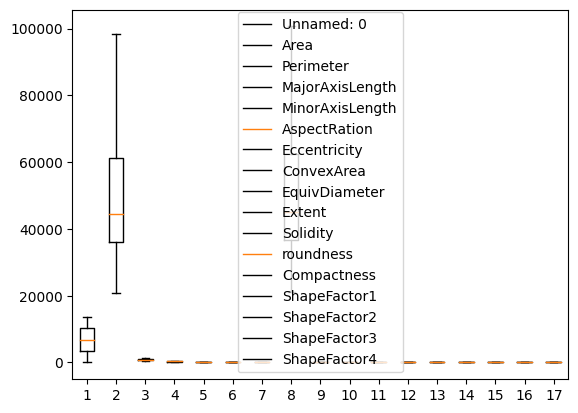

In [31]:
#box plot
plt.boxplot(X_test,showfliers=False)
plt.legend(X_test.columns)
plt.show()